In [19]:
# Model 클래스 상속

In [20]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix


In [21]:
# 1) 컬럼명 정의 (마지막이 레이블 target)
cols = [
    "area", "perimeter", "compactness",
    "length", "width", "asymmetry", "groove_length",
    "target"
]

# 2) 데이터 로드
df = pd.read_csv('./seeds_dataset.txt', sep=r'\s+', names=cols)


In [22]:
# 3) 특성과 레이블 분리
X = df.drop("target", axis=1).values      # (210, 7)
y = df["target"].values - 1               # 1,2,3 → 0,1,2

In [23]:
# 4) 학습/테스트 셋 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [24]:
# 5) 특성 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [25]:
# 6) 텐서로 변환
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)
X_test  = tf.convert_to_tensor(X_test,  dtype=tf.float32)
y_test  = tf.convert_to_tensor(y_test,  dtype=tf.int32)


In [26]:
# 7) Model 서브클래싱 정의
class SimpleMLP(Model):
    def __init__(self, num_classes):
        super(SimpleMLP, self).__init__(name='mlp')
        # 은닉층: 32 유닛, sigmoid
        self.dense1 = Dense(32, activation='sigmoid', name="hidden1")
        # 출력층: num_classes 유닛, softmax (다중 분류)
        self.dense2 = Dense(num_classes, activation='softmax', name="output")

    def call(self, inputs):
        x = self.dense1(inputs)
        return self.dense2(x)

In [27]:
# 8) 모델 생성
model_sub = SimpleMLP(num_classes=3)


In [28]:
# 9) 컴파일
model_sub.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [29]:
# 10) 학습
history = model_sub.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=16,
    verbose=1
)

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.3550 - loss: 1.0591 - val_accuracy: 0.2353 - val_loss: 1.0563
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.3620 - loss: 0.9955 - val_accuracy: 0.3235 - val_loss: 0.9716
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.4831 - loss: 0.9500 - val_accuracy: 0.6176 - val_loss: 0.9040
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5983 - loss: 0.9061 - val_accuracy: 0.8235 - val_loss: 0.8540
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7490 - loss: 0.8604 - val_accuracy: 0.8529 - val_loss: 0.8093
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8165 - loss: 0.8321 - val_accuracy: 0.9412 - val_loss: 0.7702
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9055 - loss: 0.8030 - val_accuracy: 0.9118 - val_loss: 0.7372
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9202 - loss: 0.7864 - val_accuracy: 0.9118 - val_loss: 0.7091


In [30]:
# 11) 평가
loss, acc = model_sub.evaluate(X_test, y_test, verbose=0)
print(f"테스트 데이터 정확도: {acc:.4f}")


테스트 데이터 정확도: 0.8810


>>> 전체 손실(loss): 0.4255
>>> 전체 정확도(accuracy): 0.8810

=== Classification Report ===
              precision    recall  f1-score   support

           0     1.0000    0.6429    0.7826        14
           1     0.8750    1.0000    0.9333        14
           2     0.8235    1.0000    0.9032        14

    accuracy                         0.8810        42
   macro avg     0.8995    0.8810    0.8731        42
weighted avg     0.8995    0.8810    0.8731        42

=== Confusion Matrix ===
[[ 9  2  3]
 [ 0 14  0]
 [ 0  0 14]]


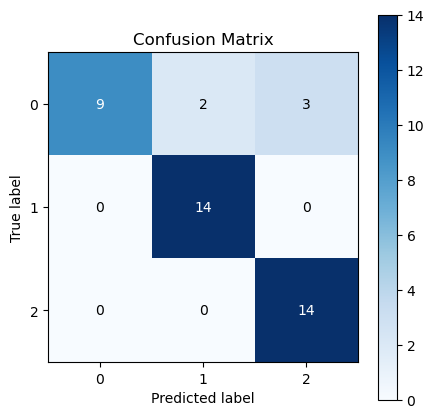

In [35]:

# 1) 기본 평가: loss, accuracy
loss, acc = model_sub.evaluate(X_test, y_test, verbose=0)
print(f">>> 전체 손실(loss): {loss:.4f}")
print(f">>> 전체 정확도(accuracy): {acc:.4f}")

# 2) 예측 수행: 확률 → 클래스 라벨
y_prob = model_sub.predict(X_test, verbose=0)         # shape: (N, 3)
y_pred = np.argmax(y_prob, axis=1)                # 가장 높은 확률 인덱스를 예측 클래스라벨로

# 3) 클래스별 리포트 출력
#    - precision, recall, f1-score, support(샘플 수)
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=4))

# 4) 혼동 행렬 출력
print("=== Confusion Matrix ===")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# 5) (선택) 혼동 행렬을 시각화하려면 matplotlib만 사용
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5,5))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.set(
    xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=[0,1,2],    # 클래스 라벨
    yticklabels=[0,1,2],
    ylabel='True label',
    xlabel='Predicted label',
    title='Confusion Matrix'
)
plt.colorbar(im, ax=ax)
# 각 셀에 숫자 표시
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
plt.show()